In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_column',None)
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Coffee Shop Sales.xlsx')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


#### **Data Exploration**

In [3]:
df.shape

(149116, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [5]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe(include = 'number')

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [8]:
data = df.copy()

## **Feature Enginnering**

In [9]:
data['transaction_timestamp'] = df['transaction_date'].astype(str) + ' ' + data['transaction_time'].astype(str)

In [10]:
data['transaction_timestamp'] = pd.to_datetime(data['transaction_timestamp'])

In [11]:
data.dtypes

,0
transaction_id,int64
transaction_date,datetime64[ns]
transaction_time,object
transaction_qty,int64
store_id,int64
store_location,object
product_id,int64
unit_price,float64
product_category,object
product_type,object


In [12]:
# Creating month column for further analysis
data['transaction_month'] = data['transaction_date'].dt.month

In [13]:
data['transaction_monthname'] = data['transaction_date'].dt.month_name()

In [14]:
data['day_of_week'] = data['transaction_date'].dt.day_of_week
data['day'] = data['transaction_date'].dt.day_name()

In [15]:
data['transaction_hour'] = data['transaction_timestamp'].dt.hour

In [16]:
data['sales'] = data['transaction_qty'] * data['unit_price']

In [17]:
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_timestamp,transaction_month,transaction_monthname,day_of_week,day,transaction_hour,sales
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01 07:06:11,1,January,6,Sunday,7,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:08:56,1,January,6,Sunday,7,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01 07:14:04,1,January,6,Sunday,7,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01 07:20:24,1,January,6,Sunday,7,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01 07:22:41,1,January,6,Sunday,7,6.2


## **Data Exploration**

In [18]:
#Earliest and Latest record
print('Earliest date :', data['transaction_timestamp'].min())
print('Latest date :',data['transaction_timestamp'].max())

Earliest date : 2023-01-01 07:06:11
Latest date : 2023-06-30 20:57:19


In [19]:
# footfall per hour
data['transaction_hour'].value_counts().sort_index(ascending= True)

,count
transaction_hour,
6,4594
7,13428
8,17654
9,17764
10,18545
11,9766
12,8708
13,8714
14,8933


In [20]:
#transaction quantity
data['transaction_qty'].value_counts()

,count
transaction_qty,
1,87159
2,58642
3,3279
4,23
8,10
6,3


In [21]:
# no. of stores and locations
print(data['store_id'].nunique())
print(data['store_location'].unique())

3
['Lower Manhattan' "Hell's Kitchen" 'Astoria']


In [22]:
#unique product categories
print(data['product_category'].nunique())
print(data['product_category'].unique())

9
['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


## **Data Analysis**

#### **KPI's**

In [23]:
#Total sales
total_sales = round(data['sales'].sum())
total_sales

698812

In [24]:
# Total Orders
total_orders= data['transaction_id'].count()
total_orders

149116

In [25]:
# Total Quantity Ordered
total_quantity = data['transaction_qty'].sum()
total_quantity

214470

In [26]:
# No. of working days
no_of_days = data['transaction_date'].nunique()
no_of_days

181

In [27]:
# Average Order per Day
avg_order_pday = round(total_orders/no_of_days)
avg_order_pday

824

In [28]:
#Average Order Value(AOV)
aov = round(total_sales/total_quantity,2)
aov

3.26

#### **Order Analysis**

**Order by Transaction Hours**

In [29]:
hourly_orders = data.groupby(['transaction_hour'], as_index = False).agg(Orders =('transaction_id', 'count'))
hourly_orders

,transaction_hour,Orders
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


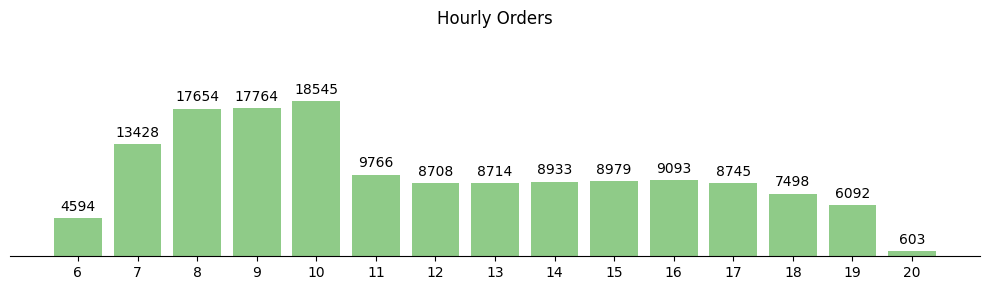

In [30]:
fig, ax = plt.subplots(figsize=[10, 3])
ax.bar(x=hourly_orders['transaction_hour'].astype(str), height=hourly_orders['Orders'], color='#8FCB88')

# Title
ax.set_title('Hourly Orders', pad = 50)

# Spine
ax.spines[['top','right', 'left']].set_visible(False)

# Remove y-axis
ax.yaxis.set_visible(False)

# Add values on top of bars
for index, values in enumerate(hourly_orders['Orders']):
  ax.annotate(str(values), xy= (index, values + 500), ha = 'center', va ='bottom')


# for i in range(len(hourly_orders)):
#     ax.text(hourly_orders['transaction_hour'][i], hourly_orders['Orders'][i],
#             str(hourly_orders['Orders'][i]), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

plt.show()


**Order by Day of Week**

In [31]:
weekly_orders = data.groupby(['day_of_week','day'],as_index = False).agg(Orders = ('transaction_id', 'count'))
weekly_orders

,day_of_week,day,Orders
0,0,Monday,21643
1,1,Tuesday,21202
2,2,Wednesday,21310
3,3,Thursday,21654
4,4,Friday,21701
5,5,Saturday,20510
6,6,Sunday,21096


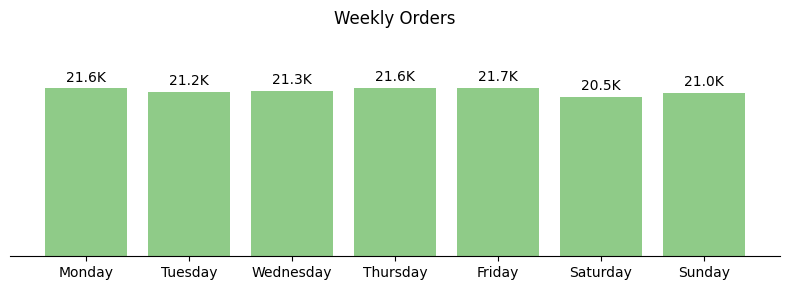

In [32]:
fig, ax = plt.subplots(figsize = [8,3])
ax.bar(x = weekly_orders['day'], height= weekly_orders['Orders'], color = '#8FCB88')

#title
ax.set_title('Weekly Orders',pad = 40)

#Spine
ax.spines[['top','right','left']].set_visible(False)

#y-axis
ax.yaxis.set_visible(False)

#data labels
for index, values in enumerate(weekly_orders['Orders']):
  ax.annotate(str(values/1000)[0:4] + "K", xy = (index,values + 500), ha = 'center', va = 'bottom')

plt.tight_layout()

plt.show()

**Orders by Day of Week and Hour**

In [33]:
day_hour_orders = data.pivot_table(
    index = 'day_of_week',
    columns = 'transaction_hour',
    values = 'transaction_id',
    aggfunc= 'count'
)
day_hour_orders

transaction_hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
day_of_week,,,,,,,,,,,,,,,
0,661,1992,2482,2494,2612,1478,1308,1267,1376,1319,1355,1302,1077,846,74
1,489,1846,2783,2753,2846,1301,1126,1152,1224,1254,1227,1232,957,872,140
2,698,1873,2540,2527,2596,1468,1226,1311,1257,1270,1272,1235,1118,836,83
3,731,1959,2389,2375,2570,1470,1307,1317,1341,1323,1406,1311,1125,970,60
4,707,1989,2544,2707,2761,1405,1231,1199,1265,1295,1257,1226,1149,886,80
5,592,1877,2438,2345,2551,1307,1279,1187,1226,1287,1287,1178,1019,846,91
6,716,1892,2478,2563,2609,1337,1231,1281,1244,1231,1289,1261,1053,836,75


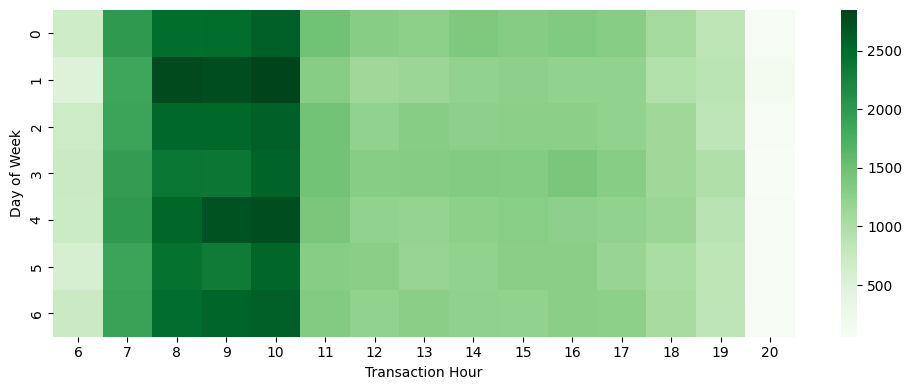

In [34]:
#Heatmap
fig, ax = plt.subplots(figsize = [10,4])

sns.heatmap(day_hour_orders, cmap = 'Greens')
ax.set_xlabel('Transaction Hour')
ax.set_ylabel('Day of Week')

plt.tight_layout()
plt.show()

**Orders by Months**

In [35]:
monthly_orders= data.groupby(['transaction_month','transaction_monthname'], as_index = False).agg(Orders = ('transaction_id', 'count'))
monthly_orders

,transaction_month,transaction_monthname,Orders
0,1,January,17314
1,2,February,16359
2,3,March,21229
3,4,April,25335
4,5,May,33527
5,6,June,35352


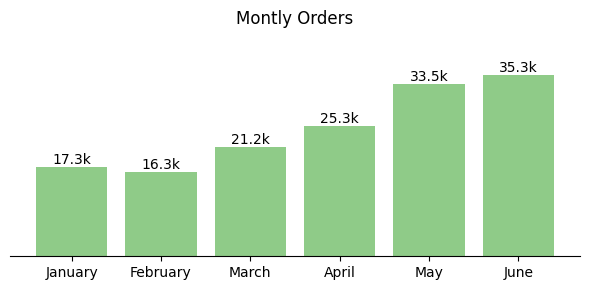

In [36]:
fig,ax = plt.subplots(figsize = [6,3])

ax.bar(x = monthly_orders['transaction_monthname'], height = monthly_orders['Orders'], color = '#8FCB88')

ax.set_title('Montly Orders', pad = 30)

ax.spines[['top', 'right','left']].set_visible(False)


ax.yaxis.set_visible(False)

for index, values in enumerate(monthly_orders['Orders']):
  ax.annotate(str(values/1000)[0:4]+ "k", xy = (index, values), ha= 'center', va='bottom')

plt.tight_layout()
plt.show()

**Order by Stores**

In [37]:
#orders by Stores
store_orders = data.groupby(['store_id','store_location'], as_index = False).agg(
                  Orders = ('transaction_id', 'count')).sort_values('Orders', ascending = False)
store_orders

,store_id,store_location,Orders
2,8,Hell's Kitchen,50735
0,3,Astoria,50599
1,5,Lower Manhattan,47782


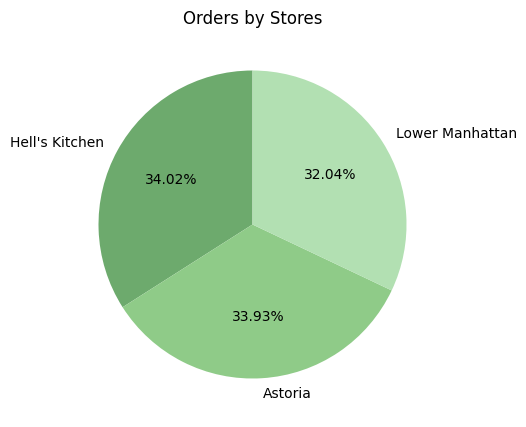

In [38]:
fig, ax = plt.subplots(figsize =[7,5])

colors = ['#6DAA6D', '#8FCB88', '#B2E0B2']
ax.pie(store_orders['Orders'], labels =store_orders['store_location'], autopct= "%0.2f%%", startangle= 90, colors = colors)

#title
ax.set_title('Orders by Stores')
plt.show()

**Orders by Product Category**

In [39]:
data.groupby(['product_category'], as_index = False).agg(
                  Orders = ('transaction_id','count')).sort_values('Orders',ascending = False)

,product_category,Orders
2,Coffee,58416
8,Tea,45449
0,Bakery,22796
4,Drinking Chocolate,11468
5,Flavours,6790
3,Coffee beans,1753
6,Loose Tea,1210
1,Branded,747
7,Packaged Chocolate,487


**Top 10 Products**

In [40]:
data.groupby(['product_type'],as_index = False).agg(
    Orders = ('transaction_id','count')).sort_values('Orders', ascending = False).head(10)

,product_type,Orders
4,Brewed Chai tea,17183
13,Gourmet brewed coffee,16912
0,Barista Espresso,16403
17,Hot chocolate,11468
3,Brewed Black tea,11350
6,Brewed herbal tea,11245
27,Scone,10173
22,Organic brewed coffee,8489
10,Drip coffee,8477
25,Premium brewed coffee,8135


#### **Revenue Analysis**

**Monthly Revenue**

In [41]:
data.groupby(['transaction_month', 'transaction_monthname'],as_index = False).agg(Sales = ('sales', 'sum'))

,transaction_month,transaction_monthname,Sales
0,1,January,81677.74
1,2,February,76145.19
2,3,March,98834.68
3,4,April,118941.08
4,5,May,156727.76
5,6,June,166485.88


**Revenue by Product Category**

In [42]:
data.groupby(['product_category'], as_index= False).agg(Sales = ('sales','sum')).sort_values('Sales',ascending = False)

,product_category,Sales
2,Coffee,269952.45
8,Tea,196405.95
0,Bakery,82315.64
4,Drinking Chocolate,72416.00
3,Coffee beans,40085.25
1,Branded,13607.00
6,Loose Tea,11213.60
5,Flavours,8408.80
7,Packaged Chocolate,4407.64


**Top 10 products by revenue**

In [43]:
data.groupby(['product_type'],as_index = False).agg(Sales =('sales','sum')).sort_values('Sales', ascending = False).head(10)

,product_type,Sales
0,Barista Espresso,91406.20
4,Brewed Chai tea,77081.95
17,Hot chocolate,72416.00
13,Gourmet brewed coffee,70034.60
3,Brewed Black tea,47932.00
6,Brewed herbal tea,47539.50
25,Premium brewed coffee,38781.15
22,Organic brewed coffee,37746.50
27,Scone,36866.12
10,Drip coffee,31984.00
